# Tools for Analyzing Time Series of Satellite Imagery (TATSSI)

In [1]:
# Import TATSSI libraries
from helpers import utils
from TATSSI.notebooks.helpers.time_series_analysis import TimeSeriesAnalysis

<IPython.core.display.Javascript object>


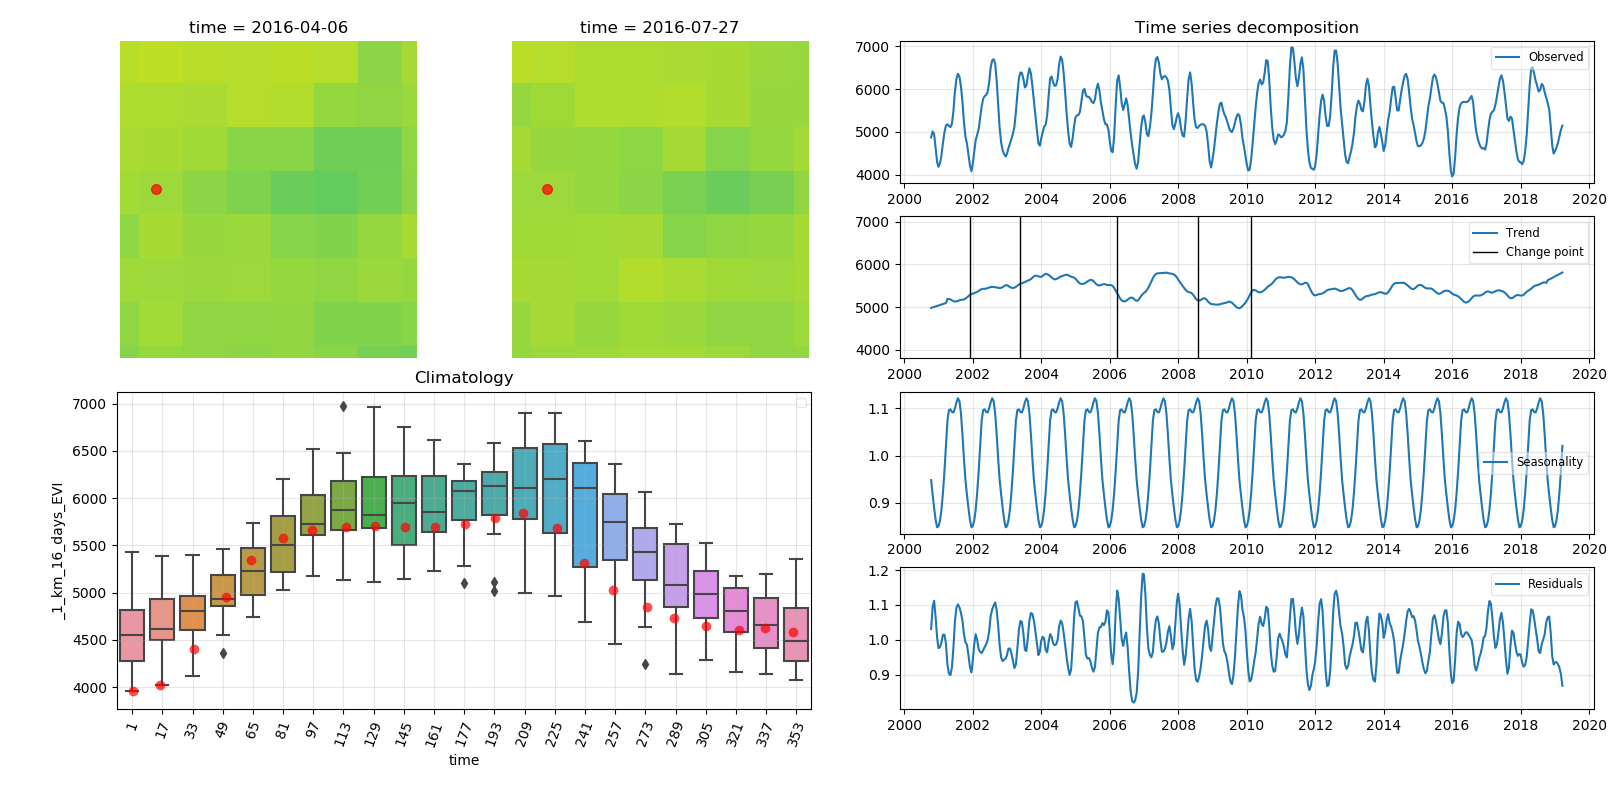

In [2]:
# Time series analysis object
#fname = '/home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_NDVI/interpolated/MOD13A2.006._1_km_16_days_NDVI.linear.tif'
#fname = '/home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/interpolated/MOD13A2.006._1_km_16_days_EVI.linear.tif'
tsa = None
fname = '/home/glopez/Projects/TATSSI/data/MOD13A2.006/1_km_16_days_EVI/interpolated/MOD13A2.006._1_km_16_days_EVI.linear.smoothn.tif'
tsa = TimeSeriesAnalysis(fname=fname, cmap='viridis')

In [3]:
tsa.debug_view

Output(layout=Layout(border='1px solid black'))